In [1]:
# this is from "https://jovian.com/aakashns/python-sklearn-linear-regression"

import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
medical_df = pd.read_csv('/Users/home_dada/BobbyProgramming/KRBV0723-1/medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['pink', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green','blue','orange','grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [14]:
px.histogram(medical_df, x='region', color='sex', title='Smoker')

In [15]:
px.histogram(medical_df, x='children', color='region', title='Smoker')

In [16]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [18]:
fig = px.scatter(medical_df, 
                 x='children', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [19]:
fig = px.scatter(medical_df, 
                 x='region', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Text(0, 0.5, 'Charges')

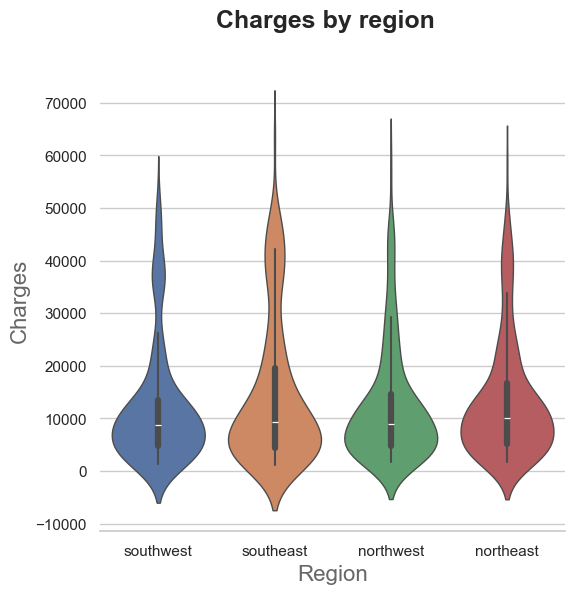

In [21]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 6))

# Show each distribution with both violins and points
# sns.violinplot(x="region",y="charges",data=medical_df, inner="box", palette="Set2", cut=2, linewidth=1)
# above line - palette has been deprecated, use hue and legend=False instead
sns.violinplot(x="region",y="charges",data=medical_df, inner="box", hue="region", legend=False,cut=2, linewidth=1)

sns.despine(left=True)

f.suptitle('Charges by region', fontsize=18, fontweight='bold')
ax.set_xlabel("Region",size = 16,alpha=0.7)
ax.set_ylabel("Charges",size = 16,alpha=0.7)

Text(0, 0.5, 'Charges')

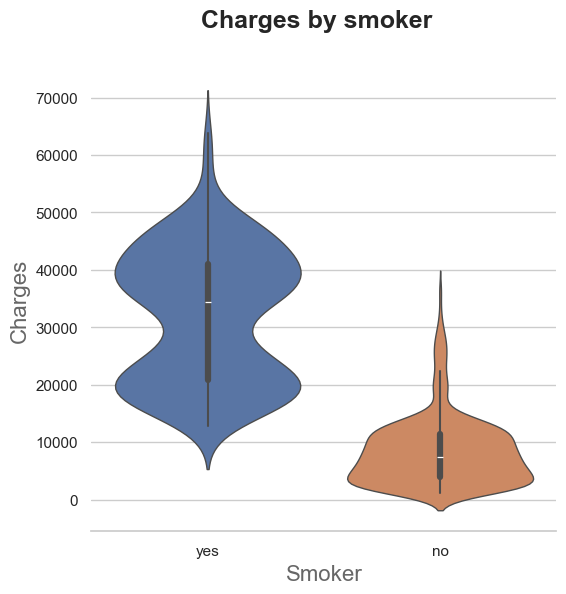

In [23]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 6))

# Show each distribution with both violins and points
# sns.violinplot(x="region",y="charges",data=medical_df, inner="box", palette="Set2", cut=2, linewidth=1)
# above line - palette has been deprecated, use hue and legend=False instead
sns.violinplot(x="smoker",y="charges",data=medical_df, inner="box", hue="smoker", legend=False,cut=2, linewidth=1)

sns.despine(left=True)

f.suptitle('Charges by smoker', fontsize=18, fontweight='bold')
ax.set_xlabel("Smoker",size = 16,alpha=0.7)
ax.set_ylabel("Charges",size = 16,alpha=0.7)